In [3]:
import cmocean
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.ticker as mticker
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.size' : 11}
plt.rcParams.update(rc)

In [4]:
#1D Spectra
Ekx07 = np.load('Ekx07.npy')
Ekz07 = np.load('Ekz07.npy')
Ekz07_2 = np.load('Ekz07_2.npy')

Ekx1 = np.load('Ekx1.npy')
Ekz1 = np.load('Ekz1.npy')
Ekz1_2 = np.load('Ekz1_2.npy')

Ekx2 = np.load('Ekx2.npy')
Ekz2 = np.load('Ekz2.npy')
Ekz2_2 = np.load('Ekz2_2.npy')


In [5]:
#Wavenumbers
m = np.linspace(0,256,257)*(2*np.pi/14.28)
kx =  np.linspace(0,341,341)*(2*np.pi/28.56)

In [6]:
#Ozmidov wavenumbers
MO1 = (1/(0.004)**0.5)
MO2 = (0.5**1.5/(0.004)**0.5)
MO07 = (np.sqrt(2)**1.5/(0.004)**0.5)



In [7]:
#Spectra normalisation constants
N1 = np.trapz(Ekx07[:341], kx)
N2 = np.trapz(Ekx1[:341], kx)
N3 = np.trapz(Ekx2[:341], kx)

N4 = np.trapz(m[:170]**3*Ekz07[:170], m[:170])
N5 = np.trapz(m[:170]**3*Ekz1[:170], m[:170])
N6 = np.trapz(m[:170]**3*Ekz2[:170], m[:170])

N7 = np.trapz(m[:170]**3*Ekz07[:170], m[:170])
N8 = np.trapz(m[:170]**3*Ekz1[:170], m[:170])
N9 = np.trapz(m[:170]**(3)*Ekz2[:170], m[:170])

N10 = np.trapz(m[:170]**(5/3)*Ekz07[:170], m[:170])
N11 = np.trapz(m[:170]**(5/3)*Ekz1[:170], m[:170])
N12 = np.trapz(m[:170]**(5/3)*Ekz2[:170], m[:170])

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


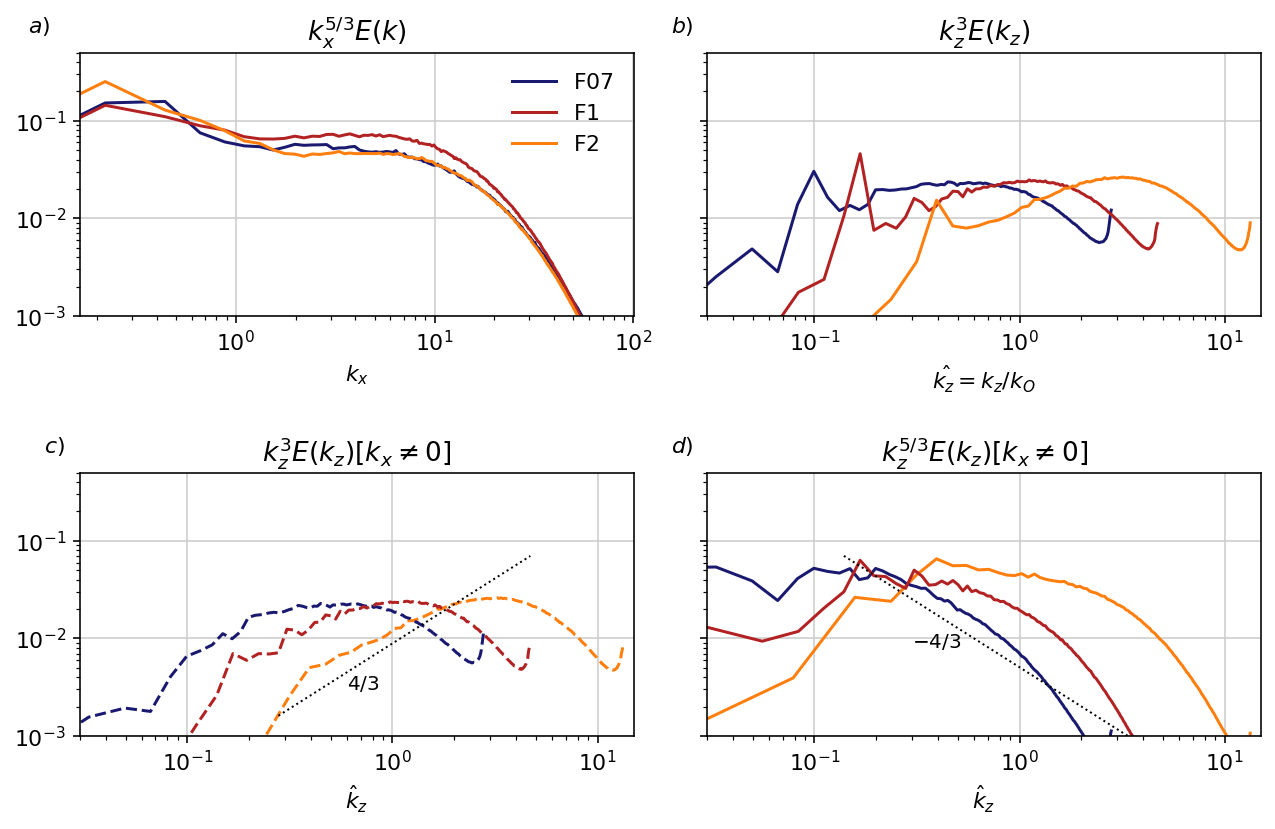

In [8]:
fig, axs = plt.subplots(2,2, figsize=(9,6))
axs[0,0].plot(kx, kx**(5/3)*Ekx07[:341]/N1, color='midnightblue', label='$\\mathrm{F07}$')
axs[0,0].plot(kx, kx**(5/3)*Ekx1[:341]/N2, color='firebrick', label='$\\mathrm{F1}$')
axs[0,0].plot(kx, kx**(5/3)*Ekx2[:341]/N3, color='tab:orange', label='$\\mathrm{F2}$')
axs[0,0].set_ylim(0.001, 0.5)
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_xlabel('$k_x$')
axs[0,0].set_title('$k_x^{5/3}E(k)$')
axs[0,0].annotate('$a)$', (0.09,0.8), annotation_clip=False)
axs[0,0].legend(frameon=False)
    
axs[0,1].plot(m[:170]/MO07, m[:170]**3*Ekz07[:170]/N4, color='midnightblue')
axs[0,1].plot(m[:170]/MO1, m[:170]**3*Ekz1[:170]/N5, color='firebrick')
axs[0,1].plot(m[:170]/MO2, m[:170]**3*Ekz2[:170]/N6, color='tab:orange')
axs[0,1].set_xlabel('$\hat{k_z}=k_z/k_O$')
axs[0,1].set_title('$k_z^{3}E(k_z)$')
axs[0,1].annotate('$b)$', (0.02,0.8), annotation_clip=False)

axs[1,0].plot(m[:170]/MO2, m[:170]**(3)*Ekz2_2[:170]/N9, color='tab:orange', linestyle='--')
axs[1,0].plot(m[:170]/MO07, m[:170]**(3)*Ekz07_2[:170]/N7,  color='midnightblue', linestyle='--')
axs[1,0].plot(m[:170]/MO1, m[:170]**(3)*Ekz1_2[:170]/N8,  color='firebrick', linestyle='--')
axs[1,0].plot(m[10:170]/MO1,0.003*(m[10:170]/7)**(4/3), linestyle='dotted', linewidth=1, color='k')
axs[1,0].annotate('$4/3$', (0.6, 0.003), size=10)
axs[1,0].set_xlabel('$\hat{k}_{z}$')
axs[1,0].set_title('$k_z^{3}E(k_z)[k_x\\neq 0]$')
axs[1,0].annotate('$c)$', (0.02,0.8), annotation_clip=False)

axs[1,1].plot(m[:170]/MO2, m[:170]**(5/3)*Ekz2_2[:170]/N12, color='tab:orange', )
axs[1,1].plot(m[:170]/MO07, m[:170]**(5/3)*Ekz07_2[:170]/N10,  color='midnightblue',)
axs[1,1].plot(m[:170]/MO1, m[:170]**(5/3)*Ekz1_2[:170]/N11,  color='firebrick', )

axs[1,1].plot(m[5:170]/MO1,0.015*(m[5:170]/7)**(-4/3), linestyle='dotted', linewidth=1, color='k')
axs[1,1].annotate('$-4/3$', (0.3, 0.008), size=10)
axs[1,1].set_xlabel('$\hat{k}_z$')
axs[1,1].set_title('$k_z^{5/3}E(k_z)[k_x\\neq 0]$')
axs[1,1].annotate('$d)$', (0.02,0.8), annotation_clip=False)

axs[0,1].set_ylim(0.001,0.5)
axs[0,1].set_xlim(0.03,15)
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')

axs[1,0].set_ylim(0.001,0.5)
axs[1,0].set_xlim(0.03,15)
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')

axs[1,1].set_ylim(0.001,0.5)
axs[1,1].set_xlim(0.03,15)
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')

axs[1,1].set_yticklabels([])
axs[0,1].set_yticklabels([])
fig.tight_layout()
fig.show()